In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = 12, 16

import healpy as hp
import pysm3
import pysm3.units as u

from fgbuster import get_instrument, get_sky, get_observation  # Predefined instrumental and sky-creation configurations
import fgbuster.separation_recipes as sr

# Imports needed for component separation
from fgbuster import (CMB, Dust, Dustmom, Synchrotron,  # sky-fitting model
                      MixingMatrix)  # separation routine

In [13]:
nside = 32
instrument = get_instrument('LiteBIRD')
freq_maps = get_observation(instrument, 'c1d0s0', nside=nside,noise=False)
fsky=0.7
cut = {0.5:53,0.6:80,0.7:121}
mask0 = hp.read_map(Pr+"Moments/masks/mask_nside512_fsky%spc_P353_smooth10deg_cut%smuK.fits"%(int(fsky*100),cut[fsky]))
mask0 = hp.ud_grade(mask0,nside_out=nside)
freq_maps = freq_maps*mask0
freq_maps= freq_maps[:,1:]

In [14]:
components = [CMB(), Dust(353.), Synchrotron(23., running=None, nu_pivot=70.)]
for comp in components:
    comp.defaults = [d*1.05 for d in comp.defaults]
nsides = [4, 1, 2, 0]
for nside, param in zip(nsides, MixingMatrix(*components).params):
    print(f"{param} is fitted for at nside {nside}")

Dust.beta_d is fitted for at nside 4
Dust.temp is fitted for at nside 1
Synchrotron.beta_pl is fitted for at nside 2
Synchrotron.running is fitted for at nside 0


In [15]:
result = sr.multi_res_comp_sep(components, instrument, freq_maps, nsides=nsides)#, method='L-BFGS-B', options=dict(disp=True))

Synchrotron.running -0.13712551254807884


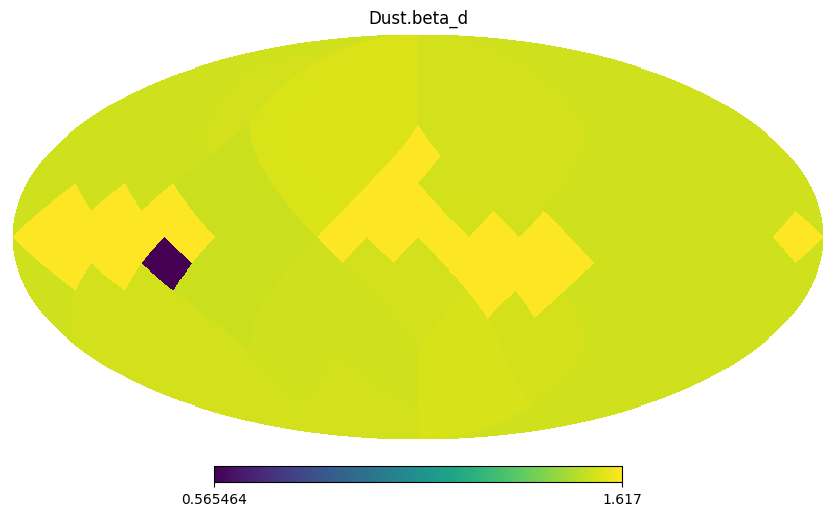

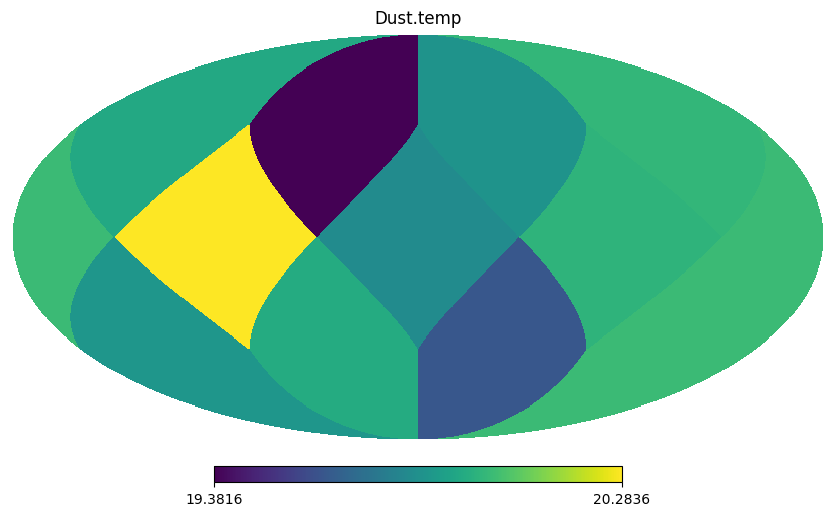

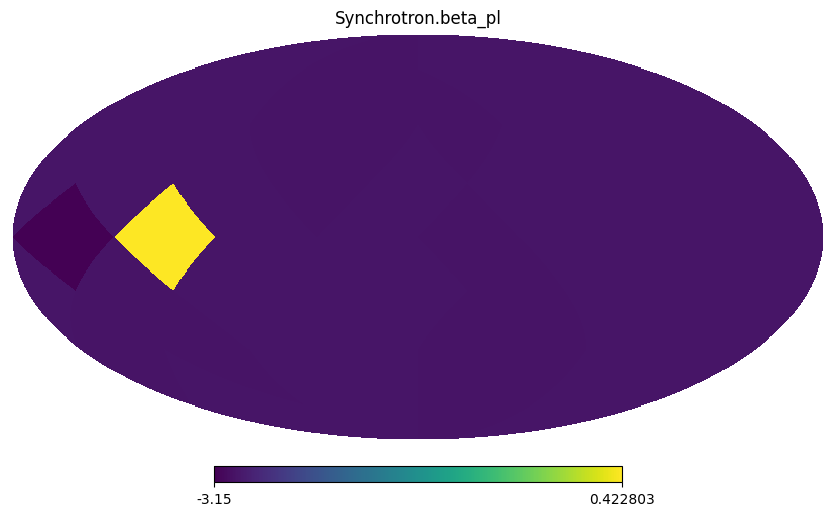

In [16]:
for par_x, par in zip(result.x, result.params):
    if len(par_x)>1:
        hp.mollview(par_x, title=par)
    else:
        print(par, par_x[0])